In [2]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
df = pd.read_csv('training.csv', names=['Timestamp', 'Hour', 'Ad', 'Browser', 'Platform', 'Region', 'Clicked'])

In [200]:
df.head()

,Timestamp,Hour,Ad,Browser,Platform,Region,Clicked
0,2014-04-13 05:42:22,5,Candy Smash,Other,iOS,South America,1
1,2014-04-14 06:50:09,6,Candy Smash,Opera,iOS,Europe,0
2,2014-04-07 04:39:27,4,Clash of Tribes,Safari,Android,North America,0
3,2014-04-25 07:14:35,7,Clash of Tribes,Internet Explorer,Android,Australia,0
4,2014-04-19 16:41:58,16,NBA Jam,Google Chrome,Unknown,North America,0


In [35]:
# Exploring the Data
print 'DF Len', len(df)
print 'Number of Clicks', df.Clicked.sum()
print "\nNumber of unique values:"
for col in df.columns:
    print col, df[col].nunique()

DF Len 10000
Number of Clicks 3889

Number of unique values:
Timestamp 9976
Hour 24
Ad 3
Browser 6
Platform 4
Region 6
Clicked 2
Day 7
Year 1
Month 2


In [20]:
# There are no missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Timestamp    10000 non-null object
Hour         10000 non-null int64
Ad           10000 non-null object
Browser      10000 non-null object
Platform     10000 non-null object
Region       10000 non-null object
Clicked      10000 non-null int64
dtypes: int64(2), object(5)
memory usage: 546.9+ KB


In [148]:
df['Day'] = df['Timestamp'].apply(lambda x: parser.parse(x).strftime("%A"))
df['Year'] = df['Timestamp'].apply(lambda x: int(x.split('-')[0]))
df['Month'] = df['Timestamp'].apply(lambda x: int(x.split('-')[1]))

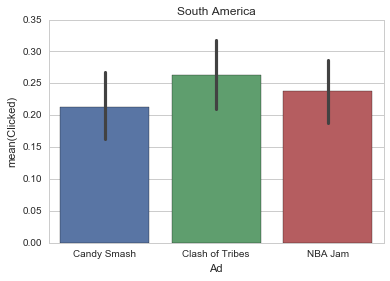

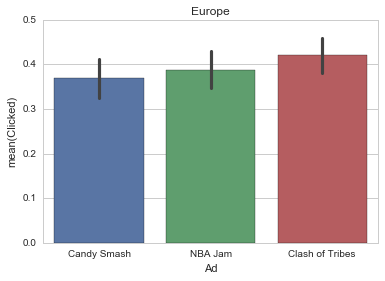

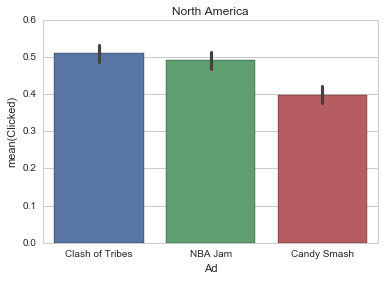

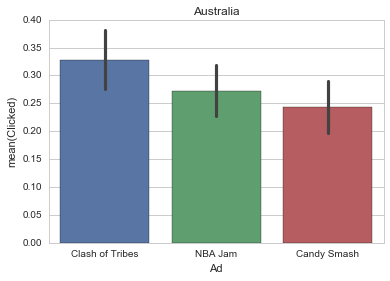

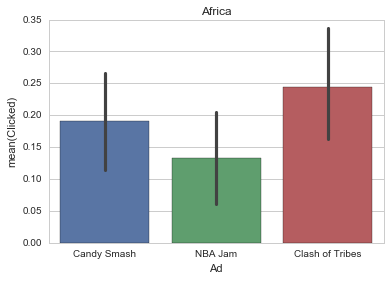

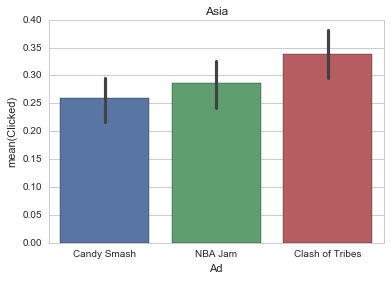

In [54]:
# Plot Ad Vs. Region
sns.set_style("whitegrid")
for region in df.Region.unique():
    sns.barplot(x='Ad', y="Clicked", data=df[df.Region == region])
    sns.plt.title(region)
    plt.show()

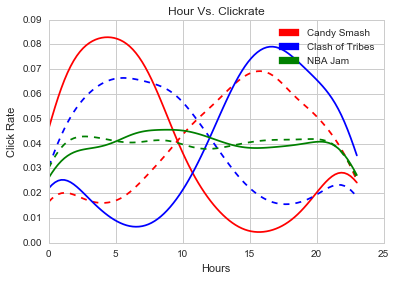

In [122]:
legend_handles = []
for ad, color in zip(df.Ad.unique(), ['red', 'blue', 'green']):

    density0 = gaussian_kde(df[(df.Clicked == 0) & (df.Ad == ad)]['Hour'])
    density1 = gaussian_kde(df[(df.Clicked == 1) & (df.Ad == ad)]['Hour'])
    # density.covariance_factor = lambda : .25
    # density._compute_covariance()
    hours = np.linspace(0, 23, 100)

    legend_handles.append(mpatches.Patch(color=color, label=ad))
    plt.legend(handles=legend_handles)
    plt.title('Hour Vs. Clickrate')
    plt.xlabel('Hours')
    plt.ylabel('Click Rate')
    plt.plot(hours ,density0(hours), ls='--', color=color)
    plt.plot(hours ,density1(hours), color=color)


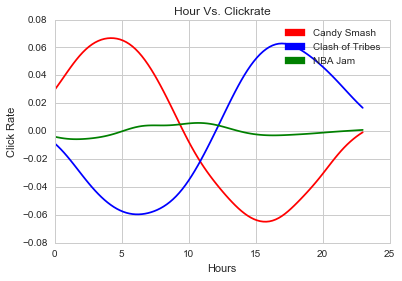

In [128]:
legend_handles = []
for ad, color in zip(df.Ad.unique(), ['red', 'blue', 'green']):

    density0 = gaussian_kde(df[(df.Clicked == 0) & (df.Ad == ad)]['Hour'])
    density1 = gaussian_kde(df[(df.Clicked == 1) & (df.Ad == ad)]['Hour'])
    hours = np.linspace(0, 23, 100)

    legend_handles.append(mpatches.Patch(color=color, label=ad))
    plt.legend(handles=legend_handles)
    plt.title('Hour Vs. Clickrate')
    plt.xlabel('Hours')
    plt.ylabel('Click Rate')
    plt.plot(hours ,density1(hours)-density0(hours), color=color)


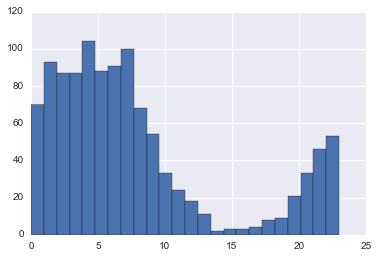

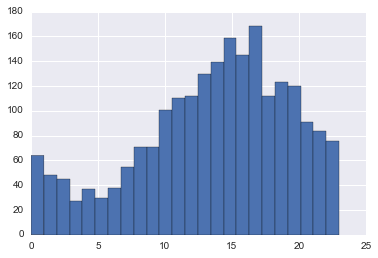

ValueError: max must be larger than min in range parameter.

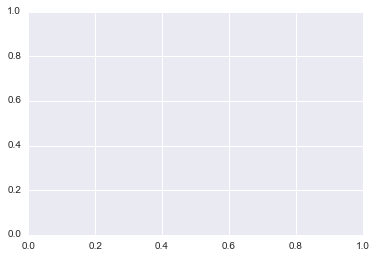

In [103]:
bar1 = df[(df.Clicked == 1) & (df.Ad == 'Candy Smash')]['Hour']
plt.hist(bar1, bins=24)
plt.show()

bar2 = df[(df.Clicked == 0) & (df.Ad == 'Candy Smash')]['Hour']
plt.hist(bar2, bins=24)
plt.show()

plt.hist(, bins=24)
plt.show()

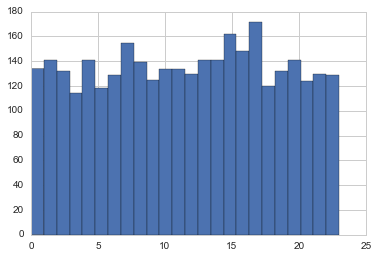

In [107]:
plt.hist(df[(df.Ad == 'Candy Smash')]['Hour'], bins=24)
plt.show()
plt.hist(df[(df.Clicked == 1) & (df.Ad == 'Candy Smash')]['Hour'], bins=24)
plt.show()
plt.hist(df[(df.Clicked == 0) & (df.Ad == 'Candy Smash')]['Hour'], bins=24)
plt.show()

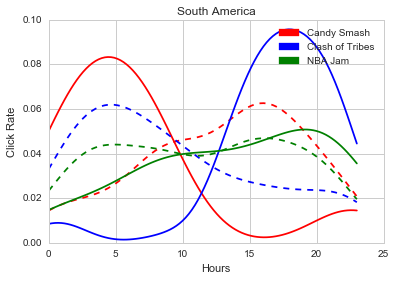

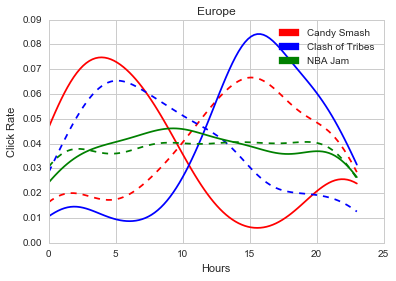

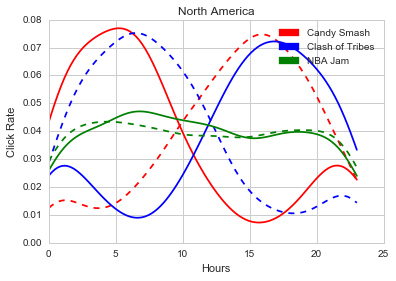

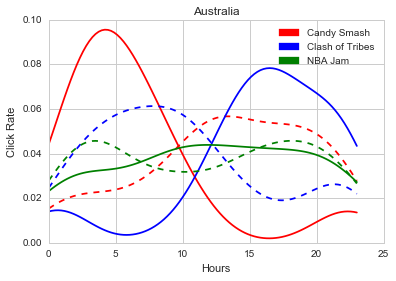

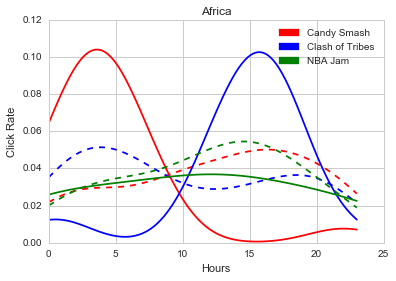

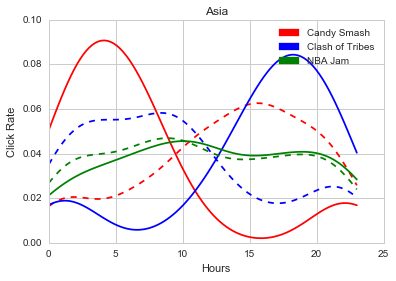

In [220]:
for region in df.Region.unique():
    legend_handles = []
    for ad, color in zip(df.Ad.unique(), ['red', 'blue', 'green']):

        density0 = gaussian_kde(df[(df.Clicked == 0) & (df.Ad == ad) & (df.Region == region)]['Hour'], bw_method=None)
        density1 = gaussian_kde(df[(df.Clicked == 1) & (df.Ad == ad) & (df.Region == region)]['Hour'], bw_method=None)
        # density.covariance_factor = lambda : .25
        # density._compute_covariance()
        hours = np.linspace(0, 23, 100)

        legend_handles.append(mpatches.Patch(color=color, label=ad))
        plt.legend(handles=legend_handles)

        plt.plot(hours ,density0(hours), ls='--', color=color)
        plt.plot(hours ,density1(hours), color=color)
        
           
    plt.title(region)
    plt.xlabel('Hours')
    plt.ylabel('Click Rate')
    plt.show()

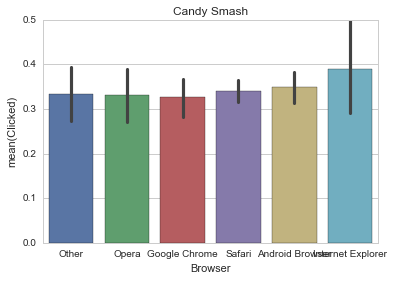

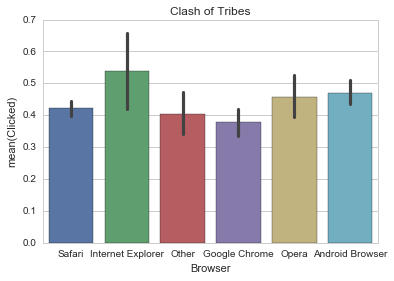

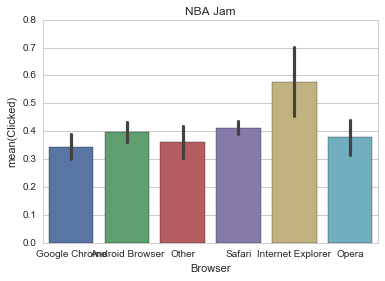

In [130]:
for ad in df.Ad.unique():
    sns.barplot(x='Browser', y="Clicked", data=df[df.Ad == ad])
    sns.plt.title(ad)
    plt.show()

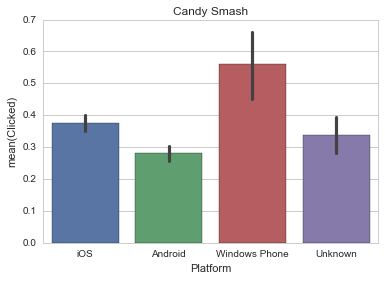

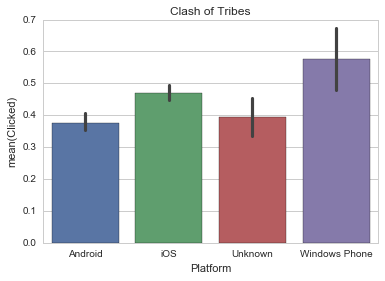

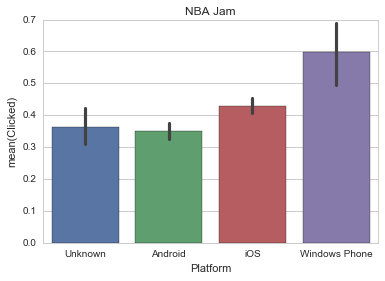

In [131]:
for ad in df.Ad.unique():
    sns.barplot(x='Platform', y="Clicked", data=df[df.Ad == ad])
    sns.plt.title(ad)
    plt.show()

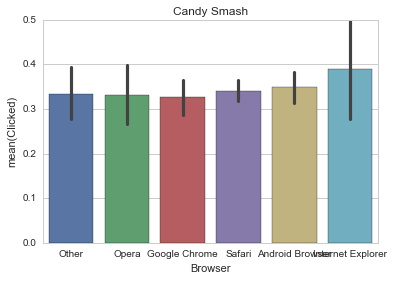

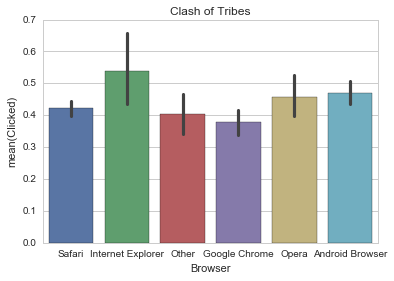

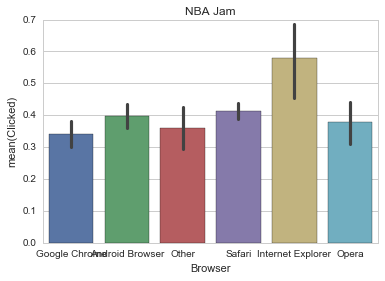

In [212]:
for ad in df.Ad.unique():
    sns.barplot(x='Browser', y="Clicked", data=df[df.Ad == ad])
    sns.plt.title(ad)
    plt.show()

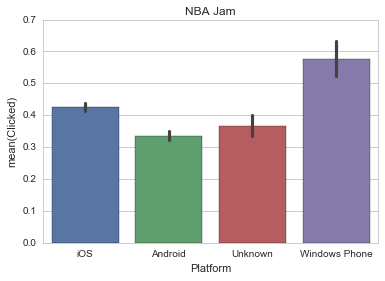

In [132]:
sns.barplot(x='Platform', y="Clicked", data=df)
sns.plt.title(ad)
plt.show()

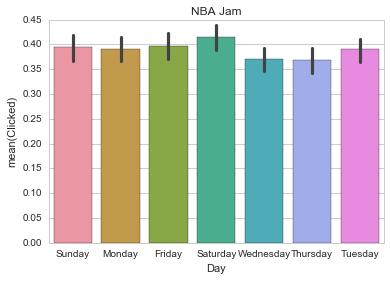

In [133]:
sns.barplot(x='Day', y="Clicked", data=df)
sns.plt.title(ad)
plt.show()

In [190]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [153]:
df.head()

,Timestamp,Hour,Ad,Browser,Platform,Region,Clicked,Day,Year,Month
0,2014-04-13 05:42:22,5,0,0,0,0,1,0,2014,4
1,2014-04-14 06:50:09,6,0,1,0,1,0,1,2014,4
2,2014-04-07 04:39:27,4,1,2,1,2,0,1,2014,4
3,2014-04-25 07:14:35,7,1,3,1,3,0,2,2014,4
4,2014-04-19 16:41:58,16,2,4,2,2,0,3,2014,4


In [152]:
# Convert Catigorical string to ints for modeling.
for col in ['Ad', 'Browser', 'Platform', 'Region', 'Day']:
    catigories = list(df[col].unique())
    df[col] = df[col].apply(lambda x: catigories.index(x))

In [157]:
df_clicked = df[df.Clicked == 1]

In [195]:
#features = ['Hour', 'Browser', 'Platform', 'Region', 'Day', 'Month']
features = ['Hour']

for n in range(1, 20):
    #clf = GradientBoostingClassifier(n_estimators=n, max_features='auto')
    #clf = RandomForestClassifier(n_estimators=20, max_features='auto')
    clf = AdaBoostClassifier(n_estimators=n)
    AdaBoostClassifier
    scores = cross_val_score(clf, df_clicked[features], df_clicked['Ad'], cv=5)
    print n, scores.mean()

1 0.532014570575
2 0.532014570575
3 0.532014570575
4 0.532014570575
5 0.532014570575
6 0.53638574307
7 0.534843326617
8 0.534071125845
9 0.535871604252
10 0.534071125845
11 0.536386404767
12 0.534843326617
13 0.531244354895
14 0.535616189087
15 0.537414020705
16 0.535357465435
17 0.53638574307
18 0.535357465435
19 0.535871604252


In [170]:
scores = cross_val_score(clf, df_clicked[features], df_clicked['Ad'], cv=5)
scores

array([ 0.53727506,  0.53984576,  0.55655527,  0.51542416,  0.54182754])

In [201]:
df.head()

,Timestamp,Hour,Ad,Browser,Platform,Region,Clicked
0,2014-04-13 05:42:22,5,Candy Smash,Other,iOS,South America,1
1,2014-04-14 06:50:09,6,Candy Smash,Opera,iOS,Europe,0
2,2014-04-07 04:39:27,4,Clash of Tribes,Safari,Android,North America,0
3,2014-04-25 07:14:35,7,Clash of Tribes,Internet Explorer,Android,Australia,0
4,2014-04-19 16:41:58,16,NBA Jam,Google Chrome,Unknown,North America,0


In [5]:
df_group = df.drop(['Timestamp', 'Browser', 'Platform'], axis=1).groupby(['Ad', 'Hour', 'Region'], as_index=False).mean()

In [6]:
df_group.head()

,Ad,Hour,Region,Clicked
0,Candy Smash,0,Africa,0.375000
1,Candy Smash,0,Asia,0.450000
2,Candy Smash,0,Australia,0.111111
3,Candy Smash,0,Europe,0.520000
4,Candy Smash,0,North America,0.655738


(-1, 1.5)

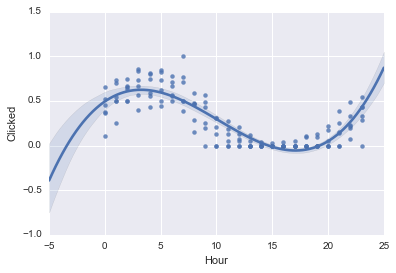

In [54]:
sns.regplot(x='Hour', y='Clicked', scatter=True, order=3, data=df_group[df_group.Ad == 'Candy Smash'])
plt.ylim(-1,1.5)

In [28]:
import statsmodels.formula.api as smf

In [ ]:
# # Convert Catigorical string to ints for modeling.
# for col in ['Region']:
#     catigories = list(df_group[col].unique())
#     df_group[col] = df_group[col].apply(lambda x: catigories.index(x))

In [90]:
formula='Clicked ~ Hour + I(Hour**4)'
model = smf.ols(formula='Clicked ~ Hour + I(Hour**3)', data=df_group[df_group.Ad == 'Candy Smash']).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Clicked   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     99.85
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           9.72e-28
Time:                        13:49:39   Log-Likelihood:                 41.963
No. Observations:                 144   AIC:                            -77.93
Df Residuals:                     141   BIC:                            -69.02
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.7677      0.038     20.114      0.000         0.692     0.843
Hour            -0.0622      0.005    -11.555      0.000        -0.073    -0.052
I(Hour ** 3)  7.342e-05   1.02e-05      7.219      0.000      5.33e-05  9.35e-05
==============================================================================
Omnibus:                        8.211   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               13.514
Skew:                           0.220   Prob(JB):                      0.00116
Kurtosis:                       4.435   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
df_group.head()

,Ad,Hour,Clicked,Africa,Asia,Australia,Europe,North America,South America,Hour**3
0,Candy Smash,0,0.375000,1.0,0.0,0.0,0.0,0.0,0.0,0
1,Candy Smash,0,0.450000,0.0,1.0,0.0,0.0,0.0,0.0,0
2,Candy Smash,0,0.111111,0.0,0.0,1.0,0.0,0.0,0.0,0
3,Candy Smash,0,0.520000,0.0,0.0,0.0,1.0,0.0,0.0,0
4,Candy Smash,0,0.655738,0.0,0.0,0.0,0.0,1.0,0.0,0


In [56]:
# Dummy Region to binary features
df_group = pd.concat([df_group, pd.get_dummies(df_group['Region'])], axis=1).drop('Region', axis=1)

# Add feature Hour*3 so the model can be fitted to the third polynomial
df_group['Hour**3'] = df_group['Hour'].apply(lambda x: x**3)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

In [101]:
ad = 'Candy Smash'
features = df_group.columns - ['Ad', 'Clicked']
y = df_group[df_group.Ad == ad]['Clicked']
X = sm.add_constant(df_group[df_group.Ad == ad][features])
model = sm.OLS(y, X).fit()
print model.summary()
print model.predict(X)

<class 'pandas.indexes.base.Index'>
                            OLS Regression Results                            
Dep. Variable:                Clicked   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     39.04
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.32e-29
Time:                        14:24:12   Log-Likelihood:                 57.768
No. Observations:                 144   AIC:                            -99.54
Df Residuals:                     136   BIC:                            -75.78
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const     

/Users/charleslynn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


In [67]:
plt.scatter()

,Hour,Clicked,Africa,Asia,Australia,Europe,North America,South America,Hour**3
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,11.503480,0.307598,0.164733,0.167053,0.167053,0.167053,0.167053,0.167053,3179.044084
std,6.937888,0.257165,0.371371,0.373457,0.373457,0.373457,0.373457,0.373457,3669.058100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.500000,0.053571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.500000
50%,12.000000,0.277778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1728.000000
75%,17.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5372.500000
max,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12167.000000


In [4]:
df.head()

,Timestamp,Hour,Ad,Browser,Platform,Region,Clicked
0,2014-04-13 05:42:22,5,Candy Smash,Other,iOS,South America,1
1,2014-04-14 06:50:09,6,Candy Smash,Opera,iOS,Europe,0
2,2014-04-07 04:39:27,4,Clash of Tribes,Safari,Android,North America,0
3,2014-04-25 07:14:35,7,Clash of Tribes,Internet Explorer,Android,Australia,0
4,2014-04-19 16:41:58,16,NBA Jam,Google Chrome,Unknown,North America,0


In [24]:
df['Timestamp'].apply(lambda x: round(float(x.split(':')[0][-2:]) + \
    float(x.split(':')[1])/60, 0))

0        6.0
1        7.0
2        5.0
3        7.0
4       17.0
5       12.0
6        3.0
7       14.0
8       19.0
9       13.0
10       2.0
11       8.0
12       3.0
13      17.0
14      21.0
15      12.0
16      15.0
17      10.0
18       8.0
19      23.0
20      24.0
21      23.0
22      17.0
23       2.0
24       9.0
25      14.0
26      23.0
27      20.0
28      19.0
29      17.0
        ... 
9970    19.0
9971    11.0
9972     1.0
9973    16.0
9974    20.0
9975    11.0
9976    14.0
9977    19.0
9978    16.0
9979     4.0
9980    10.0
9981     2.0
9982    15.0
9983     3.0
9984    19.0
9985    18.0
9986    19.0
9987    18.0
9988     4.0
9989     5.0
9990    11.0
9991     4.0
9992     9.0
9993     2.0
9994    20.0
9995     8.0
9996     2.0
9997    16.0
9998    20.0
9999    13.0
Name: Timestamp, dtype: float64

In [30]:
abs([-2, 4, 5])

TypeError: bad operand type for abs(): 'list'